### Домашнее задание 1.5

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [171]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [172]:
Y = data['affair']

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [174]:
model = LogisticRegression()

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression()

In [176]:
predictions = model.predict_proba(X_test)

In [177]:
predictions[:, 1][0]

0.6255751250082351

In [179]:
thres_list = [0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1, 0]
print(thres_list)

[0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1, 0]


In [180]:
tpr_recall_list= []
fpr_list = []
precision_list = []

In [181]:
for thres in thres_list:
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    tpr_recall = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp)

    tpr_recall_list.append(tpr_recall)
    fpr_list.append(fpr)
    precision_list.append(precision)

In [189]:
# print(tp, fp, fn, tn)

In [183]:
# creating lists of scores
print(tpr_recall_list)
print(fpr_list) 
print(precision_list)

[0.006589785831960461, 0.054365733113673806, 0.1400329489291598, 0.2372322899505766, 0.30477759472817134, 0.3723228995057661, 0.4497528830313015, 0.528830313014827, 0.700164744645799, 0.8797364085667215, 0.9884678747940692, 1.0]
[0.0, 0.006907137375287797, 0.021488871834228703, 0.047582501918649274, 0.07290867229470453, 0.10053722179585571, 0.15272448196469685, 0.19570222563315426, 0.3399846508058327, 0.6055257099002302, 0.9148119723714505, 1.0]
[1.0, 0.7857142857142857, 0.7522123893805309, 0.6990291262135923, 0.6607142857142857, 0.6330532212885154, 0.5783898305084746, 0.5572916666666666, 0.48963133640552997, 0.4036281179138322, 0.33482142857142855, 0.31780104712041884]


#### ROC curve comparison

In [184]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] ) # вероятность первого класса

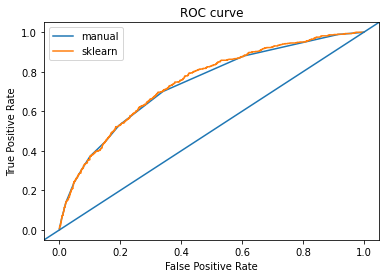

In [185]:
plt.plot( fpr_list, tpr_recall_list, label = 'manual' )
plt.plot( fpr, tpr, label = 'sklearn' )
plt.axline((1, 1), slope=1)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc = 0 )
plt.show()

#### Precision-recall curve comparison

In [186]:
from sklearn.metrics import precision_recall_curve

In [187]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

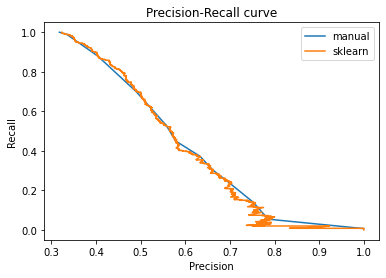

In [188]:
plt.plot( precision_list, tpr_recall_list, label = 'manual' )
plt.plot( pr, re, label = 'sklearn' )
plt.title('Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend( loc = 0 )
plt.show()